# Tutorial on 2D-Materials
## Toddler's School on Quantum Matter
### - Hands-on session

# 0. Setup
Let us start by importing some required packages:

In [7]:
using LinearAlgebra # linear algebra package (we will use it to compute eigenvalues)
using PyPlot # ploting package

# 1. Graphene Bandstructure

The tight-binding Hamiltonian for graphene can be written as
$$
H=-t\sum_{\mathbf{R}}\sum_{n=1}^{3}\left(\left|\mathbf{R},A\right\rangle \left\langle \mathbf{R}+\mathbf{t}_{n},B\right|+\left|\mathbf{R}+\mathbf{t}_{n},B\right\rangle \left\langle \mathbf{R},A\right|\right)
$$

where $\mathbf{R}$ runs over Bravais lattice sites and

$$
\begin{align*}
\mathbf{t}_{1} & =0\\
\mathbf{t}_{2} & =-\mathbf{a}_{1}\\
\mathbf{t}_{3} & =-\mathbf{a}_{2}
\end{align*}
$$.

Expressing the localized states as a Fourier series:
$$
\begin{align*}
\left|\mathbf{R},A\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{A}\right)}\left|\mathbf{k},A\right\rangle \\
\left|\mathbf{R},B\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{B}\right)}\left|\mathbf{k},B\right\rangle 
\end{align*}
$$

where 
$$
\begin{align*}
\mathbf{s}_{A} & =0\\
\mathbf{s}_{B} & =\frac{\mathbf{a}_{1}+\mathbf{a}_{2}}{3}
\end{align*}
$$

The Hamiltonian takes the form
$$
H=\sum_{\mathbf{k}}\left[\begin{array}{cc}
\left|\mathbf{k},A\right\rangle  & \left|\mathbf{k},B\right\rangle \end{array}\right]\left[\begin{array}{cc}
 & -t\gamma_{\mathbf{k}}\\
-t\gamma_{\mathbf{k}}^{*}
\end{array}\right]\left[\begin{array}{c}
\left\langle \mathbf{k},A\right|\\
\left\langle \mathbf{k},B\right|
\end{array}\right],
$$

where $\gamma_{\mathbf{k}}=\sum_{n=1}^{3}e^{i\mathbf{k}\cdot\boldsymbol{\delta}_{n}}$, with $\boldsymbol{\delta}_n$ the 3 nearest neighbour vectors, connecting an A site to a B site:
$$
\begin{align*}
\boldsymbol{\delta}_{1} & =\frac{a}{\sqrt{3}}\left(0,1\right)\\
\boldsymbol{\delta}_{2} & =\frac{a}{\sqrt{3}}\left(-\frac{\sqrt{3}}{2},-\frac{1}{2}\right)\\
\boldsymbol{\delta}_{3} & =\frac{a}{\sqrt{3}}\left(\frac{\sqrt{3}}{2},-\frac{1}{2}\right)
\end{align*}
$$

$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cc}
 & -t\gamma_{\mathbf{k}}\\
-t\gamma_{\mathbf{k}}^{*}
\end{array}\right]
$$

## Problem 1.1

Compute the eigenvalues of the Bloch Hamiltonian
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cc}
 & -t\gamma_{\mathbf{k}}\\
-t\gamma_{\mathbf{k}}^{*}
\end{array}\right].
$$

Show that you get
$$
E_{\mathbf{k},\pm}=\pm t\left|\gamma_{\mathbf{k}}\right|=\pm t\sqrt{3+2\cos\left(k_{x}a\right)+4\cos\left(\frac{\sqrt{3}}{2}k_{y}a\right)\cos\left(\frac{1}{2}k_{x}a\right)}
$$

Represent the band structure in a 2D plot and also in a 1D plot along the path $\Gamma \rightarrow K \rightarrow M \rightarrow \Gamma$, where
$$
\begin{align*}
\Gamma & =\left(0,0\right)\\
K & =\frac{4\pi}{3a}\left(1,0\right)\\
M & =\frac{2\pi}{\sqrt{3}a}\left(\frac{\sqrt{3}}{2},\frac{1}{2}\right)
\end{align*}
$$

N.B.: It is useuful to write a function that given a set of points creates a piecewise linear path that connects those points.



In [8]:
E_analytic(k) = sqrt(3 + 2*cos(k[1]) + 4*cos(sqrt(3)*k[2]/2)*cos(k[1]/2));

In [9]:
function path(vertices, npts)
    
    nverts = length(vertices)
    segment_lengths = [norm(vertices[n+1] - vertices[n]) for n=1:nverts-1]
    segment_cumulative = cumsum(segment_lengths) 
    total_length = sum(segment_lengths)
    points_per_segment = [floor(Int, (npts-1)*s/total_length) for s in segment_lengths] # distribute points per segment
    segment_density = [n/npts for n in points_per_segment]
    perm = sortperm(segment_density)
    r = npts - 1 - sum(points_per_segment) # remaning points
    for p in perm
        if r == 0
            break
        else
        points_per_segment[p] += 1
        r -= 1
        end
    end
    
    # first segment
    kpts = [vertices[1] + (vertices[2] - vertices[1])*(n-1)/points_per_segment[1] for n=1:points_per_segment[1]]
    arclength = [norm(vertices[2] - vertices[1])*(n-1)/points_per_segment[1] for n=1:points_per_segment[1]]
    
    # remaning segments
    for i=2:nverts-1
        append!(kpts, [vertices[i] + (vertices[i+1] - vertices[i])*(n-1)/points_per_segment[i] for n=1:points_per_segment[i]])
        append!(arclength, [segment_cumulative[i-1] + norm(vertices[i+1] - vertices[i])*(n-1)/points_per_segment[i] for n=1:points_per_segment[i]])
    end
    push!(kpts, vertices[end])
    push!(arclength, segment_cumulative[end])
    
    return kpts, arclength
end

path (generic function with 1 method)

In [10]:
Γ = [0.0, 0.0]
K = 4π/3*[1.0, 0.0]
M = 2π/sqrt(3)*[sqrt(3)/2, 0.5]
;

kpts, karc = path([Γ, K, M, Γ], 200);

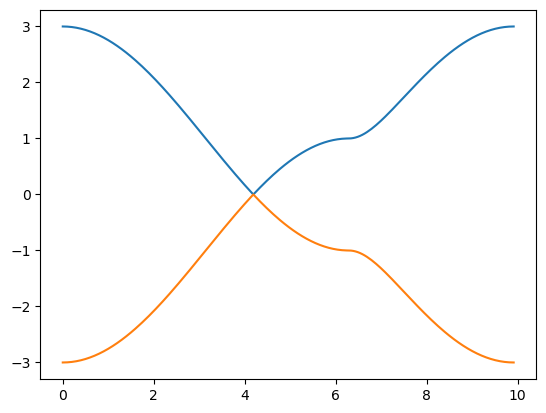

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb456fb220>

In [11]:
plot(karc, [E_analytic(k) for k in kpts])
plot(karc, [-E_analytic(k) for k in kpts])

In [12]:
xs = range(-5.0, 5.0, length = 100)
ys = range(-5.0, 5.0, length = 100)

Eks = [E_analytic([x, y]) for x in xs, y in ys];

In [13]:
pygui(true)
plot_surface(xs, ys, Eks)
plot_surface(xs, ys, -Eks)

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7feb442d4100>

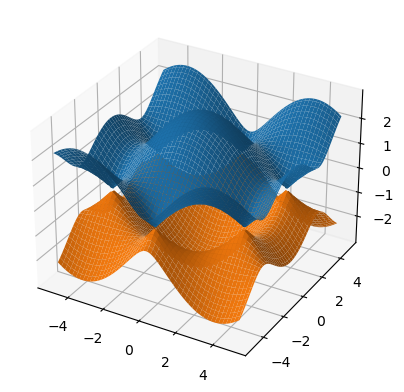

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7feb3c1a87f0>

In [14]:
pygui(false)
plot_surface(xs, ys, Eks)
plot_surface(xs, ys, -Eks)

## Problem 1.2
Implement a function that creates the matrix $\boldsymbol{H}_\mathbf{k}$ and computes the eigenvalues numerically. Compare the numerical result with the analytic one.

In [15]:
function H_graphene(k)
    
    δ1 = [0.0, 1.0]/sqrt(3)
    δ2 = [-sqrt(3)/2, -1/2]/sqrt(3)
    δ3 = [sqrt(3)/2, -1/2]/sqrt(3)
    
    γk = cis(dot(k, δ1)) + cis(dot(k, δ2)) + cis(dot(k, δ3))
    
    return [0 -γk; -conj(γk) 0]
end

H_graphene (generic function with 1 method)

In [16]:
function bandstructure(hk, kpts)
    
    return [eigvals(hk(k)) for k in kpts]

end

bandstructure (generic function with 1 method)

In [17]:
graphene_bandstructure = bandstructure(H_graphene, kpts);

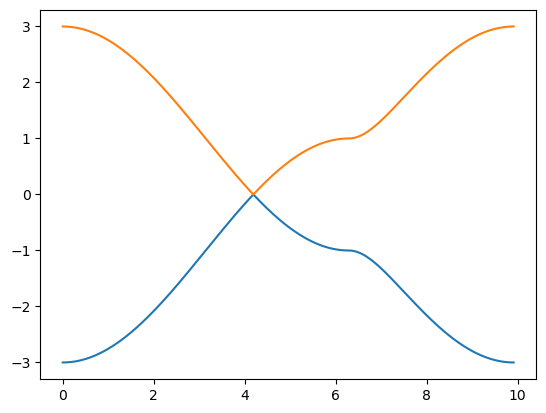

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb30342700>

In [18]:
plot(karc, [En[1] for En in graphene_bandstructure])
plot(karc, [En[2] for En in graphene_bandstructure])

## Problem 1.3
Consider the low energy (Dirac) approximation to the graphene Hamiltonian:
$$
\boldsymbol{H}_{K+\mathbf{p}}\simeq H_{\mathbf{p}}^{\text{Dirac}}=v_{F}\hbar\left[\begin{array}{cc}
 & p_{x}-ip_{y}\\
p_{x}+ip_{y}
\end{array}\right]
$$
where $
v_{F}\hbar=\sqrt{3}ta/2$.

Implement a function that creates the matrix $\boldsymbol{H}^\text{Dirac}_\mathbf{p}$ and computes the eigenvalues numerically. Compare the obtained bands with the dispersion from the the previous problem. (N.B.: the momentum $\mathbf{p}$ is measured with respect to the K point).

In [19]:
function H_Dirac(p)
    h = zeros(Complex{Float64}, 2, 2)
    h[1, 2] = sqrt(3)/2*(p[1] - im*p[2])
    h[2, 1] = sqrt(3)/2*(p[1] + im*p[2])
    return h
end

H_Dirac (generic function with 1 method)

In [20]:
dirac_bandstructure = bandstructure(k -> H_Dirac(k-K), kpts);

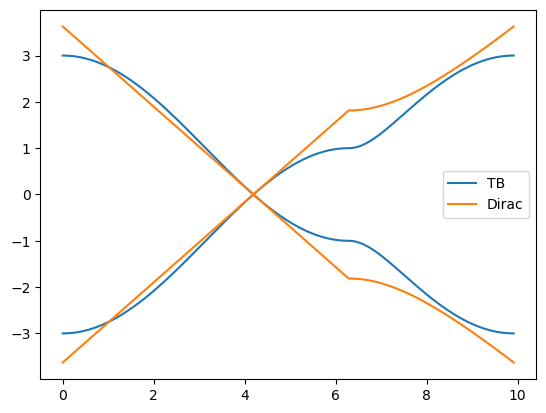

PyObject <matplotlib.legend.Legend object at 0x7feb30148310>

In [21]:
plot(karc, [En[1] for En in graphene_bandstructure], c = "C0")
plot(karc, [En[2] for En in graphene_bandstructure], c = "C0", label = "TB")

plot(karc, [En[1] for En in dirac_bandstructure],  c = "C1")
plot(karc, [En[2] for En in dirac_bandstructure],  c = "C1", label = "Dirac")
legend()

## Problem 1.4
Now let us study the effect of having unequal atoms occupying the sites A and B. This can be modelled by modifying the Hamiltonian:
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cc}
\Delta & -t\gamma_{\mathbf{k}}\\
-t\gamma_{\mathbf{k}}^{*} & -\Delta
\end{array}\right]
$$
Modify the functions from Problem 1.2 and 1.3 to include this modification. Plot the bandstructure and study the effect of changing $\Delta$.

In [22]:
function H_graphene_mass(k, m)
    
    δ1 = [0.0, 1.0]/sqrt(3)
    δ2 = [-sqrt(3)/2, -1/2]/sqrt(3)
    δ3 = [sqrt(3)/2, -1/2]/sqrt(3)
    
    γk = cis(dot(k, δ1)) + cis(dot(k, δ2)) + cis(dot(k, δ3))
    
    return [m -γk; -conj(γk) -m]
end

function H_Dirac_mass(p, m)
    h = zeros(Complex{Float64}, 2, 2)
    h[1, 2] = sqrt(3)/2*(p[1] - im*p[2])
    h[2, 1] = sqrt(3)/2*(p[1] + im*p[2])
    h[1, 1] = m
    h[2, 2] = -m
    
    return h
end

H_Dirac_mass (generic function with 1 method)

In [23]:
dirac_mass_bandstructure = bandstructure(k -> H_Dirac_mass(k-K, 0.2), kpts)
graphene_mass_bandstructure = bandstructure(k -> H_graphene_mass(k, 0.2), kpts)
;

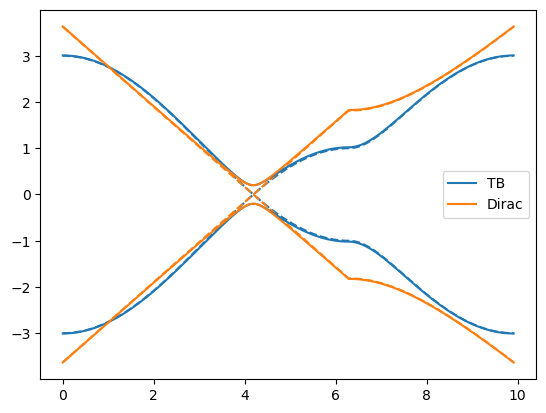

PyObject <matplotlib.legend.Legend object at 0x7feb30152280>

In [24]:
plot(karc, [En[1] for En in graphene_bandstructure], c = "C0", "--")
plot(karc, [En[2] for En in graphene_bandstructure], c = "C0", "--")

plot(karc, [En[1] for En in dirac_bandstructure],  c = "C1", "--")
plot(karc, [En[2] for En in dirac_bandstructure],  c = "C1", "--")


plot(karc, [En[1] for En in graphene_mass_bandstructure], c = "C0")
plot(karc, [En[2] for En in graphene_mass_bandstructure], c = "C0", label = "TB")

plot(karc, [En[1] for En in dirac_mass_bandstructure],  c = "C1")
plot(karc, [En[2] for En in dirac_mass_bandstructure],  c = "C1", label = "Dirac")
legend()

# 2. Bernal Stacked bilayer graphene
The Hamiltonian for Bernal stacked bilayer graphene can be written as
$$
\begin{align*}
H= & -t\sum_{\mathbf{R}}\sum_{n=1}^{3}\left(\left|\mathbf{R},A,1\right\rangle \left\langle \mathbf{R}+\mathbf{t}_{n},B,1\right|+\left|\mathbf{R}+\mathbf{t}_{n},B,1\right\rangle \left\langle \mathbf{R},A,1\right|\right)\\
 & -t\sum_{\mathbf{R}}\sum_{n=1}^{3}\left(\left|\mathbf{R},A,2\right\rangle \left\langle \mathbf{R}+\mathbf{t}_{n},B,2\right|+\left|\mathbf{R}+\mathbf{t}_{n},B,2\right\rangle \left\langle \mathbf{R},A,2\right|\right)\\
 & +t_{\perp}\sum_{\mathbf{R}}\left(\left|\mathbf{R},A,1\right\rangle \left\langle \mathbf{R},B,2\right|+\left|\mathbf{R},B,2\right\rangle \left\langle \mathbf{R},A,1\right|\right)
\end{align*}
$$

Making a Fourier transform
$$
\begin{align*}
\left|\mathbf{R},A,1\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{A,1}\right)}\left|\mathbf{k},A,1\right\rangle \\
\left|\mathbf{R},B,1\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{B,1}\right)}\left|\mathbf{k},B,1\right\rangle \\
\left|\mathbf{R},A,2\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{A,2}\right)}\left|\mathbf{k},A,2\right\rangle \\
\left|\mathbf{R},B,2\right\rangle  & =\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{-i\mathbf{k}\cdot\left(\mathbf{R}+\mathbf{s}_{B,2}\right)}\left|\mathbf{k},B,2\right\rangle 
\end{align*}
$$

where
$$
\begin{align*}
\mathbf{s}_{A,1} & =0\\
\mathbf{s}_{B,1} & =\frac{\mathbf{a}_{1}+\mathbf{a}_{2}}{3}\\
\mathbf{s}_{A,2} & =-\frac{\mathbf{a}_{1}+\mathbf{a}_{2}}{3}\\
\mathbf{s}_{B,2} & =0
\end{align*}
$$

We obtain the Hamiltonian
$$
\begin{align*}
H= & \sum_{\mathbf{k}}\left[\begin{array}{cccc}
\left|\mathbf{k},A,1\right\rangle  & \left|\mathbf{k},B,1\right\rangle  & \left|\mathbf{k},A,2\right\rangle  & \left|\mathbf{k},B,2\right\rangle \end{array}\right]\cdot\\
 & \hfill\hfill\left[\begin{array}{cccc}
0 & -t\gamma_{\mathbf{k}} & 0 & t_{\perp}\\
-t\gamma_{\mathbf{k}}^{*} & 0 & 0 & 0\\
0 & 0 & 0 & -t\gamma_{\mathbf{k}}\\
t_{\perp} & 0 & -t\gamma_{\mathbf{k}}^{*} & 0
\end{array}\right]\left[\begin{array}{c}
\left\langle \mathbf{k},A,1\right|\\
\left\langle \mathbf{k},B,1\right|\\
\left\langle \mathbf{k},A,2\right|\\
\left\langle \mathbf{k},B,2\right|
\end{array}\right]
\end{align*}
$$

## Problem 2.1
Implement a function that implements the Bloch Hamiltonian
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cccc}
0 & -t\gamma_{\mathbf{k}} & 0 & t_{\perp}\\
-t\gamma_{\mathbf{k}}^{*} & 0 & 0 & 0\\
0 & 0 & 0 & -t\gamma_{\mathbf{k}}\\
t_{\perp} & 0 & -t\gamma_{\mathbf{k}}^{*} & 0
\end{array}\right]
$$

and computes its eigenenergies. Make 2D and 1D representations of the band strucutre (use the same path as for graphene).

In [25]:
function H_bilayer(k, tperp)
    
    h = zeros(Complex{Float64}, 4, 4)
    
    δ1 = [0.0, 1.0]/sqrt(3)
    δ2 = [-sqrt(3)/2, -1/2]/sqrt(3)
    δ3 = [sqrt(3)/2, -1/2]/sqrt(3)
    
    γk = cis(dot(k, δ1)) + cis(dot(k, δ2)) + cis(dot(k, δ3))
    
    h[1, 2] = -γk
    h[2, 1] = -conj(γk)
    h[3, 4] = -γk
    h[4, 3] = -conj(γk)
    
    h[1, 4] = tperp
    h[4,1] = tperp
    
    return h
end

H_bilayer (generic function with 1 method)

In [26]:
bilayer_bandstructure = bandstructure(k -> H_bilayer(k, 0.2), kpts)
;

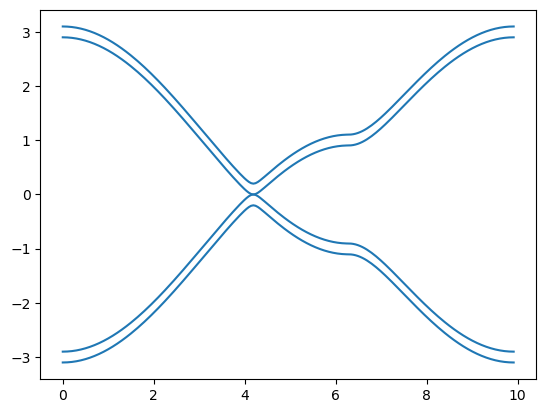

In [27]:
for n=1:4
    plot(karc, [En[n] for En in bilayer_bandstructure], c = "C0")
end

sqrt(3)/2*(p[1] - im*p[2])# Problem 2.2
Consider the low energy approximation to the band structure close to the K point:
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cccc}
0 & v_{F}\hbar\left(p_{x}-ip_{y}\right) & 0 & -t_{\perp}\\
v_{F}\hbar\left(p_{x}+ip_{y}\right) & 0 & 0 & 0\\
0 & 0 & 0 & v_{F}\hbar\left(p_{x}-ip_{y}\right)\\
-t_{\perp} & 0 & v_{F}\hbar\left(p_{x}+ip_{y}\right) & 0
\end{array}\right]
$$
Compute the band structure for this case and compare with the full bandstructure.

In [28]:
function H_bilayer_low(p, tperp)
    
    h = zeros(Complex{Float64}, 4, 4)
        
    h[1, 2] = sqrt(3)/2*(p[1] - im*p[2])
    h[2, 1] = sqrt(3)/2*(p[1] + im*p[2])
    h[3, 4] = sqrt(3)/2*(p[1] - im*p[2])
    h[4, 3] = sqrt(3)/2*(p[1] + im*p[2])
    
    h[1, 4] = -tperp
    h[4,1] = -tperp
    
    return h
end

H_bilayer_low (generic function with 1 method)

In [29]:
bilayer_low_bandstructure = bandstructure(k -> H_bilayer_low(k - K, 0.2), kpts)
;

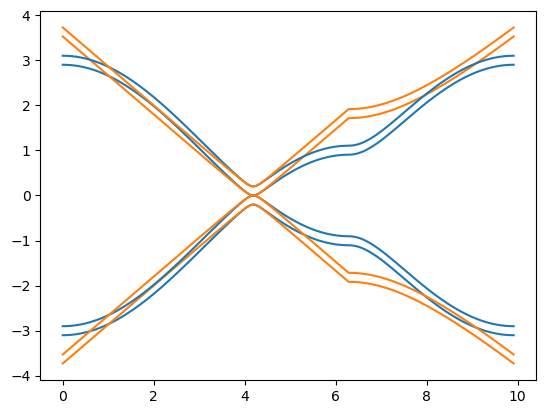

In [30]:
for n=1:4
    plot(karc, [En[n] for En in bilayer_bandstructure], c = "C0")
    plot(karc, [En[n] for En in bilayer_low_bandstructure], c = "C1")
end

## Problem 2.3
The effect of an applied interlayer bias potential can be modelled by modifying the Hamiltonian to
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cccc}
V/2 & -t\gamma_{\mathbf{k}} & 0 & -t_{\perp}\\
-t\gamma_{\mathbf{k}}^{*} & V/2 & 0 & 0\\
0 & 0 & -V/2 & -t\gamma_{\mathbf{k}}\\
-t_{\perp} & 0 & -t\gamma_{\mathbf{k}}^{*} & -V/2
\end{array}\right]
$$

Modify the function from the previous problem to this case. Study the effect of  V on the bandstruture.

In [31]:
function H_bilayer_bias(k, tperp, V)
    
    h = zeros(Complex{Float64}, 4, 4)
    
    δ1 = [0.0, 1.0]/sqrt(3)
    δ2 = [-sqrt(3)/2, -1/2]/sqrt(3)
    δ3 = [sqrt(3)/2, -1/2]/sqrt(3)
    
    γk = cis(dot(k, δ1)) + cis(dot(k, δ2)) + cis(dot(k, δ3))
    
    h[1, 2] = -γk
    h[2, 1] = -conj(γk)
    h[3, 4] = -γk
    h[4, 3] = -conj(γk)
    
    h[1, 4] = -tperp
    h[4,1] = -tperp
    
    h[1, 1] = V/2
    h[2, 2] = V/2
    h[3, 3] = -V/2
    h[4, 4] = -V/2
    
    return h
end

H_bilayer_bias (generic function with 1 method)

In [32]:
bilayer_bias_bandstructure = bandstructure(k -> H_bilayer_bias(k, 0.2, 0.2), kpts)
;

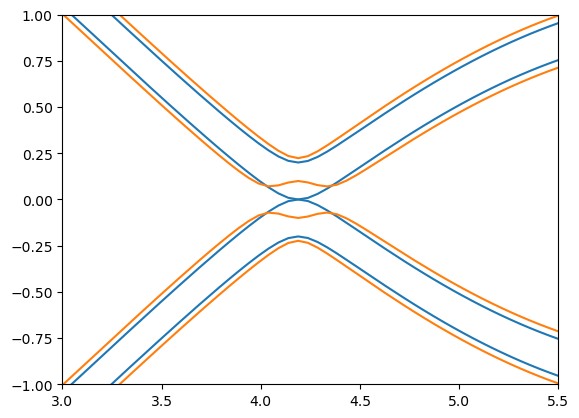

(-1.0, 1.0)

In [33]:
for n=1:4
    plot(karc, [En[n] for En in bilayer_bandstructure], c = "C0")
    plot(karc, [En[n] for En in bilayer_bias_bandstructure], c = "C1")
end
xlim(3.0, 5.5)
ylim(-1,1)

# Problem 2.4 (bonus)

AA-stacked graphene is decribed by the Hamiltonian
$$
\boldsymbol{H}_{\mathbf{k}}=\left[\begin{array}{cccc}
0 & -t\gamma_{\mathbf{k}} & t_{\perp} & 0\\
-t\gamma_{\mathbf{k}}^{*} & 0 & 0 & t_{\perp}\\
t_{\perp} & 0 & 0 & -t\gamma_{\mathbf{k}}\\
0 & t_{\perp} & -t\gamma_{\mathbf{k}}^{*} & 0
\end{array}\right]
$$

Study the bandstructure for this case. Also study the effect of an applied interlayer bias.

In [36]:
function H_bilayer_AA(k, tperp, V)
    
    h = zeros(Complex{Float64}, 4, 4)
    
    δ1 = [0.0, 1.0]/sqrt(3)
    δ2 = [-sqrt(3)/2, -1/2]/sqrt(3)
    δ3 = [sqrt(3)/2, -1/2]/sqrt(3)
    
    γk = cis(dot(k, δ1)) + cis(dot(k, δ2)) + cis(dot(k, δ3))
    
    h[1, 2] = -γk
    h[2, 1] = -conj(γk)
    h[3, 4] = -γk
    h[4, 3] = -conj(γk)
    
    h[1, 3] = tperp
    h[2, 4] = tperp
    h[3, 1] = tperp
    h[4, 2] = tperp
    
    h[1, 1] = V/2
    h[2, 2] = V/2
    h[3, 3] = -V/2
    h[4, 4] = -V/2
    
    return h
end

H_bilayer_AA (generic function with 1 method)

In [37]:
bilayer_AA_bias_bandstructure = bandstructure(k -> H_bilayer_AA(k, 0.2, 0.5), kpts)
bilayer_AA_bandstructure = bandstructure(k -> H_bilayer_AA(k, 0.2, 0.0), kpts)
;

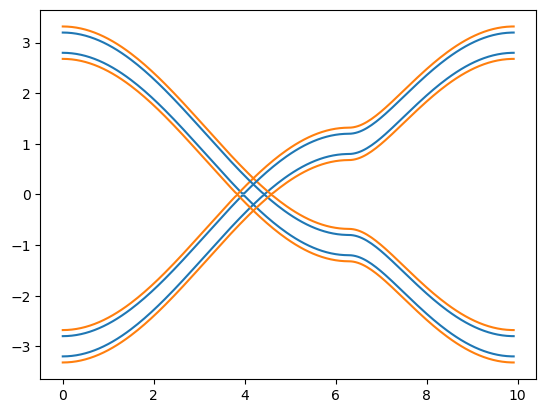

In [38]:
for n=1:4
    plot(karc, [En[n] for En in bilayer_AA_bandstructure], c = "C0")
    plot(karc, [En[n] for En in bilayer_AA_bias_bandstructure], c = "C1")
end

# 3. Twisted bilayer graphene

## Problem 3.1
Implement a function that builds the 2-wave approximation Hamiltonian to twisted bilayer graphene:
$$
H_{\mathbf{p}}^{2-\text{wave}}=\left[\begin{array}{cc}
\boldsymbol{H}_{\theta/2}(\mathbf{p}-\Delta\mathbf{K}) & \boldsymbol{T}_{0}\\
\boldsymbol{T}_{0}^{\dagger} & \boldsymbol{H}_{-\theta/2}(\mathbf{p})
\end{array}\right]
$$
where
$$
\begin{align*}
\boldsymbol{H}_{\theta}(\mathbf{p}) & =v_{F}\hbar\left[\begin{array}{cc}
 & p_{x}^{\theta}-ip_{y}^{\theta}\\
p_{x}^{\theta}+ip_{y}^{\theta}
\end{array}\right]\\
p_{x}^{\theta} & =\cos\theta p_{x}+\sin\theta p_{y}\\
p_{y}^{\theta} & =-\sin\theta p_{x}+\cos\theta p_{y}.
\end{align*}
$$

and
$$
\boldsymbol{T}_{0}  =\left[\begin{array}{cc}
t_{12} & t_{12}\\
t_{12} & t_{12}
\end{array}\right]
$$

In [39]:
function γ(k, theta)
    
    p1 = cos(theta)*k[1] + sin(theta)*k[2]
    p2 = -sin(theta)*k[1] + cos(theta)*k[2]
    
    return sqrt(3)/2*(p1 - im*p2)
end

function H_tblg_2wave(k, theta, t12)
    
    h = zeros(Complex{Float64}, 4, 4)
    ΔK = 4pi/3*2*sin(theta/2)*[0.0, 1.0]
    
    h[1, 2] = γ(k - ΔK, theta/2)
    h[2, 1] = conj(γ(k - ΔK, theta/2))
    
    h[3, 4] = γ(k, -theta/2)
    h[4, 3] = conj(γ(k, -theta/2))
    
    h[1, 3] = t12
    h[1, 4] = t12
    h[2, 3] = t12
    h[2, 4] = t12
    
    h[3, 1] = t12
    h[3, 2] = t12
    h[4, 1] = t12
    h[4, 2] = t12
    
    return h
end

H_tblg_2wave (generic function with 1 method)

In [40]:
theta = 5*pi/180
K1 = 4pi/3*[cos(theta/2), sin(theta/2)]
K2 = 4pi/3*[cos(theta/2), -sin(theta/2)]

kpts_2, karc_2 = path([K2, K1], 200)
;

In [41]:
tblg_2wave_bandstructure = bandstructure(k -> H_tblg_2wave(k - K2, theta, 0.05), kpts_2)
tblg0_2wave_bandstructure = bandstructure(k -> H_tblg_2wave(k - K2, theta, 0), kpts_2)
;

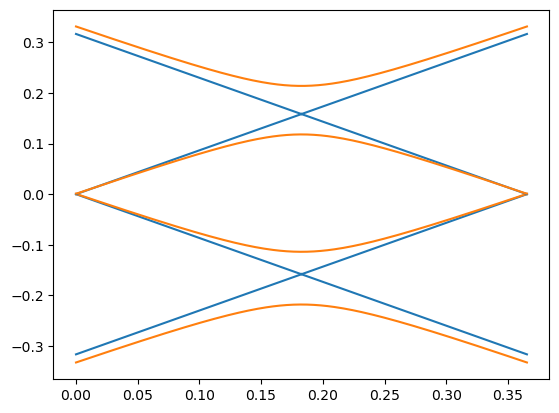

In [42]:
for n=1:4
    plot(karc_2, [En[n] for En in tblg0_2wave_bandstructure], c = "C0")
    plot(karc_2, [En[n] for En in tblg_2wave_bandstructure], c = "C1")
end

## Problem 3.2
Implement a function that builds the 4-wave approximation Hamiltonian of twisted bilayer graphene:
$$
H_{\mathbf{p}}^{4-\text{wave}}=\left[\begin{array}{cccc}
\boldsymbol{H}_{\theta/2}(\mathbf{p}-\Delta\mathbf{K}+\mathbf{b}_{0}^{\text{m}}) &  &  & \boldsymbol{T}_{0}\\
 & \boldsymbol{H}_{\theta/2}(\mathbf{p}-\Delta\mathbf{K}+\mathbf{b}_{1}^{\text{m}}) &  & \boldsymbol{T}_{1}\\
 &  & \boldsymbol{H}_{\theta/2}(\mathbf{p}-\Delta\mathbf{K}+\mathbf{b}_{2}^{\text{m}}) & \boldsymbol{T}_{2}\\
\boldsymbol{T}_{0}^{\dagger} & \boldsymbol{T}_{1}^{\dagger} & \boldsymbol{T}_{2}^{\dagger} & \boldsymbol{H}_{-\theta/2}(\mathbf{p})
\end{array}\right]
$$

where
$$
\begin{align*}
\mathbf{b}_{0}^{\text{m}} & =\mathbf{0}\\
\mathbf{b}_{1}^{\text{m}} & =\mathbf{b}_{2,2}-\mathbf{b}_{1,2}=\frac{4\pi}{\sqrt{3}a}2\sin\left(\frac{\theta}{2}\right)\left(\frac{1}{2},\frac{\sqrt{3}}{2}\right)\\
\mathbf{b}_{2}^{\text{m}} & =\mathbf{b}_{1,1}-\mathbf{b}_{2,1}=\frac{4\pi}{\sqrt{3}a}2\sin\left(\frac{\theta}{2}\right)\left(-\frac{1}{2},\frac{\sqrt{3}}{2}\right)
\end{align*}
$$
and
$$
\begin{align*}
\boldsymbol{T}_{0} & =\left[\begin{array}{cc}
t_{12}^{AA} & t_{12}^{AB}\\
t_{12}^{AB} & t_{12}^{AA}
\end{array}\right]\\
\boldsymbol{T}_{1} & =\left[\begin{array}{cc}
t_{12}^{AA} & e^{-i\frac{2\pi}{3}}t_{12}^{AB}\\
e^{i\frac{2\pi}{3}}t_{12}^{AB} & t_{12}^{AA}
\end{array}\right]\\
\boldsymbol{T}_{2} & =\left[\begin{array}{cc}
t_{12}^{AA} & e^{i\frac{2\pi}{3}}t_{12}^{AB}\\
e^{-i\frac{2\pi}{3}}t_{12}^{AB} & t_{12}^{AA}
\end{array}\right]
\end{align*}
$$

In [43]:
function H_tblg_4wave(k, theta, t12)
    
    h = zeros(Complex{Float64}, 8, 8)
    ΔK = 4pi/3*2*sin(theta/2)*[0.0, 1.0]
    
    b0 = [0.0, 0.0]
    b1 = 4pi/sqrt(3)*2*sin(theta/2)*[0.5, sqrt(3)/2]
    b2 = 4pi/sqrt(3)*2*sin(theta/2)*[-0.5, sqrt(3)/2]
    
    w = cis(2pi/3)
    T0 = [t12 t12; t12 t12]
    T1 = [t12 t12/w; t12*w t12]
    T2 = [t12 t12*w; t12/w t12]
    
    for (n, (b, T)) in enumerate(((b0, T0), (b1, T1), (b2, T2)))
        h[1 + 2*(n-1), 2 + 2*(n-1)] = γ(k + b - ΔK, theta/2)
        h[2 + 2*(n-1), 1 + 2*(n-1)] = conj(γ(k + b - ΔK, theta/2))
        
        for j in 1:2, i in 1:2
            h[i + 2*(n-1), j + 6] = T[i, j]
            h[j + 6, i + 2*(n-1)] = conj(T[i, j])
        end
    end
    
    h[6 + 1, 6 + 2] = γ(k, -theta/2)
    h[6 + 2, 6 + 1] = conj(γ(k, -theta/2))
    
    return h
end

H_tblg_4wave (generic function with 1 method)

In [44]:
tblg_4wave_bandstructure = bandstructure(k -> H_tblg_4wave(k - K2, theta, 0.05), kpts_2)
tblg0_4wave_bandstructure = bandstructure(k -> H_tblg_4wave(k - K2, theta, 0), kpts_2)
;

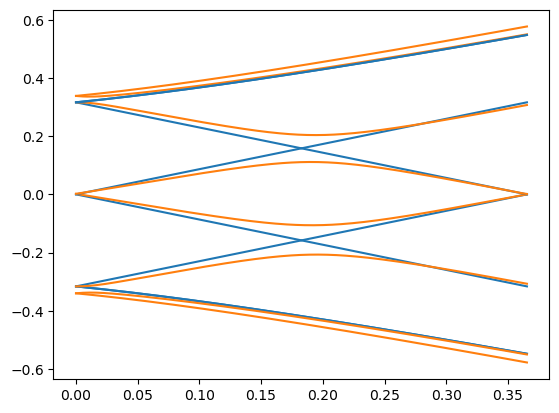

In [45]:
for n=1:8
    plot(karc_2, [En[n] for En in tblg0_4wave_bandstructure], c = "C0")
    plot(karc_2, [En[n] for En in tblg_4wave_bandstructure], c = "C1")
end

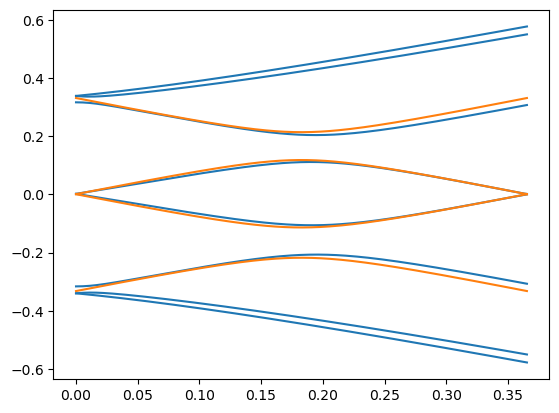

In [46]:
for n=1:8
    plot(karc_2, [En[n] for En in tblg_4wave_bandstructure], c = "C0")
end

for n=1:4
    plot(karc_2, [En[n] for En in tblg_2wave_bandstructure], c = "C1")
end

# Problem 3.3

For this exercise you don't need to write code. The ideia is to use the code that is made available and to explore what happens when diferent parameters are changed. However, if you have any question regarding the code, fell free to ask!

Use the following implementation of the N-wave approximation oftwisted bilayer graphene:

In [47]:
function spanlattice(a1, a2, radius; shift = [0.0, 0.0])
    
    N1 = Int(div(radius, norm(a1), RoundUp))
    N2 = Int(div(radius, norm(a2), RoundUp))
    
    pts_car = Vector{Float64}[]
    
    pts_lat = Vector{Int}[]

    for n1 in -N1:N1
        for n2 in -N2:N2

            pt = n1*a1 + n2*a2
            
            if norm(pt) <= radius
                push!(pts_car, pt + shift)
                push!(pts_lat, [n1, n2])
                
            end
            
        end
    end

    return pts_lat, pts_car
end

function hAB(k, theta)
    
    px = k[1]*cos(theta) + k[2]*sin(theta)
    py = k[2]*cos(theta) - k[1]*sin(theta)
    
    return px - im*py
end

struct TBLG
    twistangle::Float64
    a::Float64
    t::Float64
    tAA::Float64
    tAB::Float64
    moirebasis::Tuple{Vector{Float64}, Vector{Float64}}
    blochbasis_lattice::Vector{Vector{Int}}
    blochbasis_cartesian::Vector{Vector{Float64}}
end

dim(tblg::TBLG) = 4*length(tblg.blochbasis_lattice)

function build_tblg(theta, cutoff; a = 2.46, t = 2.7, tAA = 0.4/3/2.7, tAB = 0.4/3/2.7)
    
    b1 = 4pi/(sqrt(3)*a)*2*sin(theta/2)*[0.5, sqrt(3)/2]
    b2 = 4pi/(sqrt(3)*a)*2*sin(theta/2)*[-0.5, sqrt(3)/2]
    
    blochbasis_lattice, blochbasis_cartesian = spanlattice(b1, b2, cutoff)
    
    return TBLG(theta, a, t, tAA, tAB, (b1, b2), blochbasis_lattice, blochbasis_cartesian)
    
end

function hamiltonian(tblg::TBLG, k)
    
    theta = tblg.twistangle
    a = tblg.a
    t = tblg.t
    tAA = tblg.tAA
    tAB = tblg.tAB
    
    b1, b2 = tblg.moirebasis
    
    ΔK = 4pi/(3*a)*2*sin(theta/2)*[0.0, 1.0]
    vF = sqrt(3)*t*a/2
    
    blochbasis_lat = tblg.blochbasis_lattice
    blochbasis_cart = tblg.blochbasis_cartesian
    Ngpts = length(tblg.blochbasis_cartesian)
    
    w = cis(2pi/3)
    T0 = [tAA tAB; tAB tAA]
    T1 = [tAA tAB/w; tAB*w tAA]
    T2 = [tAA tAB*w; tAB/w tAA]
    
    Ts = (T0, T1, T2)
    bs = ([0, 0], [1, 0], [0, 1])
    
    mat = zeros(Complex{Float64}, 2*2*Ngpts, 2*2*Ngpts)
    #index matrix elements with sublattice + 2*(g-1) + 2*Ngpts*(layer-1)
    for g in 1:Ngpts
        G = blochbasis_cart[g]
        
        # intralayer terms for layer 1:
        γk1 = vF*hAB(k + G - ΔK, theta/2)
        mat[1 + 2*(g-1) + 2*Ngpts*(1-1), 2 + 2*(g-1) + 2*Ngpts*(1-1)] = γk1
        mat[2 + 2*(g-1) + 2*Ngpts*(1-1), 1 + 2*(g-1) + 2*Ngpts*(1-1)] = conj(γk1)
        
        # intralayer terms for layer 2:
        γk2 = vF*hAB(k + G, -theta/2)
        mat[1 + 2*(g-1) + 2*Ngpts*(2-1), 2 + 2*(g-1) + 2*Ngpts*(2-1)] = γk2
        mat[2 + 2*(g-1) + 2*Ngpts*(2-1), 1 + 2*(g-1) + 2*Ngpts*(2-1)] = conj(γk2)
        
        # 2->1 interlayer terms:
        for j in 1:3
            gprime = searchsortedfirst(blochbasis_lat, blochbasis_lat[g] + bs[j])
            if 1 <= gprime <= Ngpts
                for α in 1:2
                    for β in 1:2
                        mat[α + 2*(gprime-1) + 2*Ngpts*(1-1), β + 2*(g-1) + 2*Ngpts*(2-1)] = Ts[j][α, β]
                        mat[β + 2*(g-1) + 2*Ngpts*(2-1), α + 2*(gprime-1) + 2*Ngpts*(1-1)] = conj(Ts[j][α, β]) # 1->2 coupling
                    end
                end
            end
        end
        
    
    end 
    
    return mat
end

hamiltonian (generic function with 1 method)

Use the function `build_tblg` to build a twisted bilayer graphene builder with angle of 5 degrees and cutoff of 3*|ΔK|:


In [48]:
angle = 5*pi/180
a = 2.46
dK = 4pi/(3*a)*2*sin(angle/2)
cutoff = 3*dK
t = 2.7
tAA = 0.1
tAB = 0.1


tblg = build_tblg(angle, cutoff, a = a, t = t, tAA = tAA, tAB = tAB)
;

Check the dimension of the Hamiltonian:

In [49]:
dim(tblg)

28

Consider the Path: K2 ->  K2 + ΔK -> K2 + R(-2π/6)*ΔK ->  K2 + 0.5*R(-2π/3)*ΔK -> K2

which we build as

In [50]:
function tblg_path(tblg::TBLG, npts)
    theta = tblg.twistangle
    a = tblg.a 
    ΔK = 4pi/(3*a)*2*sin(theta/2)*[0.0, 1.0]
    R(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)]

    Km2 = [0.0, 0.0]
    Km1 = Km2 + ΔK 
    Γm = Km2 + R(-2pi/6)*ΔK 
    Mm = Km2 + 0.5*R(-2pi/3)*ΔK 

    return  path([Km2, Km1, Γm, Mm, Km2], npts)
    
end

tblg_path (generic function with 1 method)

In [53]:
kpts_m, karc_m = tblg_path(tblg, 300);

Let us visualize the path:

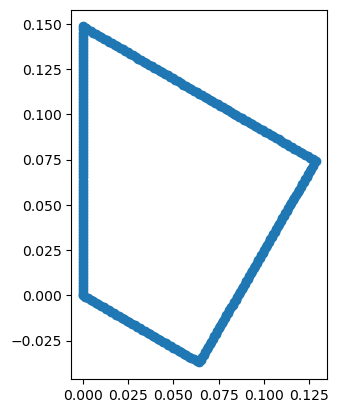

In [54]:
fig, ax = subplots()
ax.scatter([k[1] for k in kpts_m], [k[2] for k in kpts_m])
ax.set_aspect("equal")

Evaluate the band structure along the path:

In [55]:
tblg_bandstructure = bandstructure(k -> hamiltonian(tblg, k), kpts_m);

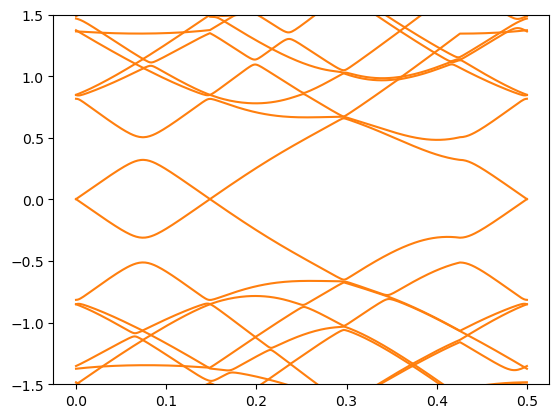

(-1.5, 1.5)

In [56]:
for n=1:dim(tblg)
    plot(karc_m, [En[n] for En in tblg_bandstructure], c = "C1")
end
ylim(-1.5, 1.5)

Explore what happens when:
- You reduce the angle, keeping everything else fixed;
- Increase the value of tAA and tAB, keeping everything else fix;
- Change the relative strength of tAA and tAB. In particular, write tAA = x.tAB and change x from 1 to 0